In [216]:
## Author: Dejun Xiang
## ID: 349329
## Project: Donald Trump analytics
## Supervisor: Prof. Richard O. Sinnott
## Pre-process tweet (English)

In [1]:
import re
import random
import nltk
from textblob import TextBlob
import numpy as np
import pandas as pd
import matplotlib as plt
from nltk.corpus import stopwords

In [2]:
# read the raw data
raw_data = pd.read_csv(r"C:\Users\Derek\Desktop\twitter\data\D-noDulplicate.csv")

In [ ]:
# download the important package
nltk.download()

In [47]:
raw_data.head(100)

,id,tweet,likes,replys,retreets,dates
0,Mother Jones\r\nVerified account\r\n,Donald Trump's poolside parties in Florida wer...,43,10,41,2018-01-01
1,Carolyn Boyle\r\n,"Stuff the whataboutism Brandon, it makes you l...",13,0,2,2018-01-01
2,Steeler\r\n,Just think if the Iranian People had GUNS to d...,16,0,3,2018-01-01
3,DiamondLynne\r\n,"Sure, sure, we All know how u work #BLOTUS\r\n...",29,4,7,2018-01-01
4,CBD QuickFacts \r\n_Â°_____Â±\r\n,"Unsealed the Obama,sealed files. America wants...",6,1,7,2018-01-01
5,ExpatSoutherner\r\n,When you apologize to Hillary Clinton and dist...,27,0,7,2018-01-01
6,________________________ ___Â®___Â¹___Â©\r\n,#DonaldTrump really needs to \r\nPlus our bur...,9,3,2,2018-01-01
7,Villi Wilson \r\n_Â¢____\r\n,Hmmm ...\r\n\r\nI_Â¢____d pick Donald Trump bu...,33,20,8,2018-01-01
8,Sister Euphemia\r\n,"Policy is not made on social media, but you ca...",12,0,8,2018-01-01
9,Jewhadi_Â¢___Â¢\r\n,True\r\n\r\nDonald Trump attacks Pakistan clai...,45,3,23,2018-01-01


In [29]:
# convert the type of dates from object to datetime64
raw_data['dates'] = pd.to_datetime(raw_data['dates'])

In [30]:
# check the result
raw_data.dtypes

id                  object
tweet               object
likes               object
replys               int64
retreets             int64
dates       datetime64[ns]
dtype: object

In [137]:
# check how many cells in likes columns is empty
raw_data.likes.isnull().sum()

642

In [196]:
sampleD = sampler(500,raw_data)

In [203]:
sampleD.tweet.iloc[55]

'Will you be selling tickets to your indictment? impeachment? resignation? and you might want to renovate the federal prisons before your stay!'

In [197]:
sampleD.to_csv(r"C:\Users\Derek\Desktop\twitter\sampleD.csv")

In [117]:
# because there are just a few empty, so we can just drop them
raw_data_notnull = raw_data[raw_data['likes'].notnull()].copy()
# fix the index to from 0 to the end
raw_data_notnull.index = range(len(raw_data_notnull))

In [118]:
# convert the data type of number of likes from object to integer
for i in range(len(raw_data_notnull)):
    s = raw_data_notnull.loc[i,'likes']
    raw_data_notnull.loc[i,'likes'] = str_to_int(s)

<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='6.4'>
6.4
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 2), match='18'>
18.0
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 2), match='37'>
37.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='7.0'>
7.0
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 2), match='14'>
14.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='2.

<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='4.5'>
4.5
<re.Match object; span=(0, 3), match='3.8'>
3.8
<re.Match object; span=(0, 3), match='5.5'>
5.5
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 2), match='47'>
47.0
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='8.7'>
8.7
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='4.

<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='7.1'>
7.1
<re.Match object; span=(0, 2), match='15'>
15.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='4.2'>
4.2
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='4.9'>
4.9
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='138'>
138.0
<re.Match object; span=(0, 3), match='4.1'>
4.1
<re.Match object; span=(0, 3), match='6.2'>
6.2
<re.Match object; span=(0, 3), match='3.9'>
3.9
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='7.9'>
7.9
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='3.2'>
3.2
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='4.0'>
4.0
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='

<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='4.8'>
4.8
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 2), match='17'>
17.0
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='3.8'>
3.8
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='9.2'>
9.2
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='6.9'>
6.9
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='4.1'>
4.1
<re.Match object; span=(0, 3), match='2.

<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='4.1'>
4.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 2), match='74'>
74.0
<re.Match object; span=(0, 3), match='4.1'>
4.1
<re.Match object; span=(0, 2), match='13'>
13.0
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 2), match='10'>
10.0
<re.Match object; span=(0, 3), match='3.

<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 2), match='11'>
11.0
<re.Match object; span=(0, 3), match='4.8'>
4.8
<re.Match object; span=(0, 3), match='3.1'>
3.1
<re.Match object; span=(0, 3), match='9.7'>
9.7
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='4.3'>
4.3
<re.Match object; span=(0, 3), match='6.2'>
6.2
<re.Match object; span=(0, 3), match='8.4'>
8.4
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='3.

<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 2), match='94'>
94.0
<re.Match object; span=(0, 3), match='7.2'>
7.2
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='140'>
140.0
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='4.3'>
4.3
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='3.9'>
3.9
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='4.3'>
4.3
<re.Match object; span=(0, 2), match='26'>
26.0
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='5.4'>
5.4
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='

<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='4.0'>
4.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 2), match='16'>
16.0
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 2), match='17'>
17.0
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 2), match='19'>
19.0
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='6.8'>
6.8
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='4.7'>
4.7
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 2), match='51'>
51.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='3.1'>
3.1
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='5.7'>
5.7
<re.Match object; span=(0, 2), match='13'>
13.0
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='4.6'>
4.6
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='3.7'>
3.7
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='5.2'>
5.2
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='7.3'>
7.3
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 2), match='69'>
69.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='9.3'>
9.3
<re.Match object; span=(0, 3), match='2.

<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='7.7'>
7.7
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='5.0'>
5.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='6.2'>
6.2
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='3.2'>
3.2
<re.Match object; span=(0, 2), match='15'>
15.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 2), match='18

<re.Match object; span=(0, 3), match='3.1'>
3.1
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='4.6'>
4.6
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 2), match='26'>
26.0
<re.Match object; span=(0, 3), match='7.6'>
7.6
<re.Match object; span=(0, 3), match='178'>
178.0
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 2), match='20'>
20.0
<re.Match object; span=(0, 2), match='15'>
15.0
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='5.5'>
5.5
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='

<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 2), match='13'>
13.0
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='5.2'>
5.2
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='5.4'>
5.4
<re.Match object; span=(0, 3), match='9.3'>
9.3
<re.Match object; span=(0, 3), match='7.4'>
7.4
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='6.7'>
6.7
<re.Match object; span=(0, 2), match='19'>
19.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='8.

<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='137'>
137.0
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 2), match='11'>
11.0
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='3.1'>
3.1
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='7.6'>
7.6
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='4.3'>
4.3
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='5.6'>
5.6
<re.Match object; span=(0, 2), match='16'>
16.0
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='

<re.Match object; span=(0, 2), match='38'>
38.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='3.2'>
3.2
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='8.1'>
8.1
<re.Match object; span=(0, 3), match='4.9'>
4.9
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='4.9'>
4.9
<re.Match object; span=(0, 3), match='3.2'>
3.2
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='7.2'>
7.2
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 2), match='22'>
22.0
<re.Match object; span=(0, 3), match='4.2'>
4.2
<re.Match object; span=(0, 3), match='5.1'>
5.1
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='109'>
109.0
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='

<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='9.4'>
9.4
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='6.7'>
6.7
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='5.0'>
5.0
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='7.5'>
7.5
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 2), match='14'>
14.0
<re.Match object; span=(0, 3), match='7.9'>
7.9
<re.Match object; span=(0, 3), match='4.6'>
4.6
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='8.

<re.Match object; span=(0, 3), match='6.0'>
6.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='4.9'>
4.9
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='7.2'>
7.2
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='4.2'>
4.2
<re.Match object; span=(0, 3), match='2.

<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='5.0'>
5.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='8.3'>
8.3
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='7.3'>
7.3
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='3.9'>
3.9
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 3), match='6.8'>
6.8
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='5.1'>
5.1
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='3.7'>
3.7
<re.Match object; span=(0, 3), match='4.7'>
4.7
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='5.1'>
5.1
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 2), match='38'>
38.0
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='4.2'>
4.2
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='5.0'>
5.0
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='7.2'>
7.2
<re.Match object; span=(0, 3), match='4.7'>
4.7
<re.Match object; span=(0, 3), match='6.0'>
6.0
<re.Match object; span=(0, 3), match='2.

<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 2), match='17'>
17.0
<re.Match object; span=(0, 3), match='4.4'>
4.4
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='6.6'>
6.6
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='3.1'>
3.1
<re.Match object; span=(0, 3), match='4.8'>
4.8
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='4.

<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='135'>
135.0
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='4.9'>
4.9
<re.Match object; span=(0, 2), match='

<re.Match object; span=(0, 2), match='11'>
11.0
<re.Match object; span=(0, 3), match='8.6'>
8.6
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='9.7'>
9.7
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 2), match='87'>
87.0
<re.Match object; span=(0, 2), match='15'>
15.0
<re.Match object; span=(0, 3), match='8.5'>
8.5
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='7.4'>
7.4
<re.Match object; span=(0, 3), match='5.2'>
5.2
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='6.3'>
6.3
<re.Match object; span=(0, 3), match='4.

<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='7.6'>
7.6
<re.Match object; span=(0, 2), match='35'>
35.0
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 2), match='14'>
14.0
<re.Match object; span=(0, 3), match='7.9'>
7.9
<re.Match object; span=(0, 3), match='3.9'>
3.9
<re.Match object; span=(0, 2), match='41'>
41.0
<re.Match object; span=(0, 3), match='5.3'>
5.3
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='125'>
125.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='

<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='9.3'>
9.3
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='7.1'>
7.1
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='138'>
138.0
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='9.4'>
9.4
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='5.7'>
5.7
<re.Match object; span=(0, 3), match='

<re.Match object; span=(0, 3), match='5.2'>
5.2
<re.Match object; span=(0, 3), match='6.3'>
6.3
<re.Match object; span=(0, 3), match='4.1'>
4.1
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='4.6'>
4.6
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 2), match='29'>
29.0
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 2), match='21'>
21.0
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='7.9'>
7.9
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='6.1'>
6.1
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='5.

<re.Match object; span=(0, 2), match='35'>
35.0
<re.Match object; span=(0, 3), match='7.8'>
7.8
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='3.7'>
3.7
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='4.5'>
4.5
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 3), match='3.7'>
3.7
<re.Match object; span=(0, 3), match='5.1'>
5.1
<re.Match object; span=(0, 3), match='6.2'>
6.2
<re.Match object; span=(0, 3), match='9.

<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='6.8'>
6.8
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='6.9'>
6.9
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='8.0'>
8.0
<re.Match object; span=(0, 2), match='17'>
17.0
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 2), match='20'>
20.0
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 2), match='10'>
10.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.

<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='8.1'>
8.1
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='4.1'>
4.1
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='4.4'>
4.4
<re.Match object; span=(0, 2), match='28'>
28.0
<re.Match object; span=(0, 3), match='4.1'>
4.1
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='8.3'>
8.3
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='5.7'>
5.7
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='4.4'>
4.4
<re.Match object; span=(0, 3), match='3.7'>
3.7
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='8.7'>
8.7
<re.Match object; span=(0, 3), match='6.9'>
6.9
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='5.2'>
5.2
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='7.8'>
7.8
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='6.0'>
6.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='6.5'>
6.5
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 2), match='10'>
10.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='5.4'>
5.4
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='6.7'>
6.7
<re.Match object; span=(0, 3), match='4.3'>
4.3
<re.Match object; span=(0, 3), match='3.7'>
3.7
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 2), match='18'>
18.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 2), match='21'>
21.0
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 2), match='21'>
21.0
<re.Match object; span=(0, 2), match='13'>
13.0
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='6.1'>
6.1
<re.Match object; span=(0, 2), match='11'>
11.0
<re.Match object; span=(0, 3), match='4.4'>
4.4
<re.Match object; span=(0, 2), match='18'>
18.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='4.4'>
4.4
<re.Match object; span=(0, 3), match='7.0'>
7.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='3.1'>
3.1
<re.Match object; span=(0, 3), match='3.8'>
3.8
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='5.2'>
5.2
<re.Match object; span=(0, 2), match='20'>
20.0
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 2), match='14'>
14.0
<re.Match object; span=(0, 3), match='5.6'>
5.6
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 2), match='16'>
16.0
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='4.2'>
4.2
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='4.9'>
4.9
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='7.1'>
7.1
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='7.7'>
7.7
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='3.7'>
3.7
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='4.4'>
4.4
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='8.9'>
8.9
<re.Match object; span=(0, 3), match='3.7'>
3.7
<re.Match object; span=(0, 3), match='3.1'>
3.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='4.7'>
4.7
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='3.7'>
3.7
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='3.2'>
3.2
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='5.2'>
5.2
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='8.7'>
8.7
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='7.3'>
7.3
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 2), match='53

<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='5.4'>
5.4
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='4.4'>
4.4
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 2), match='29'>
29.0
<re.Match object; span=(0, 3), match='2.

<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 3), match='124'>
124.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='4.3'>
4.3
<re.Match object; span=(0, 3), match='4.6'>
4.6
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='

<re.Match object; span=(0, 3), match='6.1'>
6.1
<re.Match object; span=(0, 3), match='3.8'>
3.8
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 2), match='14'>
14.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 2), match='20'>
20.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='5.9'>
5.9
<re.Match object; span=(0, 3), match='3.9'>
3.9
<re.Match object; span=(0, 3), match='5.2'>
5.2
<re.Match object; span=(0, 2), match='32'>
32.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='3.9'>
3.9
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='5.5'>
5.5
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='7.1'>
7.1
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 2), match='17'>
17.0
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='106'>
106.0
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='5.3'>
5.3
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='

<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='4.6'>
4.6
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='119'>
119.0
<re.Match object; span=(0, 3), match='3.1'>
3.1
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 2), match='10'>
10.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 2), match='

<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 2), match='10'>
10.0
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='111'>
111.0
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='4.8'>
4.8
<re.Match object; span=(0, 2), match='53'>
53.0
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 2), match='23'>
23.0
<re.Match object; span=(0, 3), match='8.5'>
8.5
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='

<re.Match object; span=(0, 3), match='3.9'>
3.9
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='4.7'>
4.7
<re.Match object; span=(0, 3), match='4.7'>
4.7
<re.Match object; span=(0, 3), match='8.1'>
8.1
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='9.7'>
9.7
<re.Match object; span=(0, 3), match='5.7'>
5.7
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='4.9'>
4.9
<re.Match object; span=(0, 3), match='8.4'>
8.4
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='2.

<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='130'>
130.0
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='5.6'>
5.6
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='6.0'>
6.0
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 3), match='

<re.Match object; span=(0, 3), match='6.2'>
6.2
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='7.2'>
7.2
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='165'>
165.0
<re.Match object; span=(0, 3), match='8.3'>
8.3
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='7.9'>
7.9
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 2), match='53'>
53.0
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='6.5'>
6.5
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 2), match='62'>
62.0
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='

<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='9.4'>
9.4
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 2), match='38'>
38.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 2), match='39'>
39.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='8.8'>
8.8
<re.Match object; span=(0, 2), match='16'>
16.0
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 2), match='84'>
84.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='3.2'>
3.2
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='3.

<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 2), match='24'>
24.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='5.2'>
5.2
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 2), match='31'>
31.0
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='3.7'>
3.7
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 2), match='21'>
21.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='7.2'>
7.2
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 2), match='23'>
23.0
<re.Match object; span=(0, 3), match='4.2'>
4.2
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='7.0'>
7.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='4.1'>
4.1
<re.Match object; span=(0, 3), match='3.1'>
3.1
<re.Match object; span=(0, 3), match='6.5'>
6.5
<re.Match object; span=(0, 3), match='3.

<re.Match object; span=(0, 2), match='25'>
25.0
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='6.8'>
6.8
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 2), match='22'>
22.0
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='4.9'>
4.9
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='5.9'>
5.9
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 2), match='13'>
13.0
<re.Match object; span=(0, 3), match='9.0'>
9.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 2), match='13'>
13.0
<re.Match object; span=(0, 3), match='5.2'>
5.2
<re.Match object; span=(0, 3), match='6.7'>
6.7
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 2), match='14'>
14.0
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='6.6'>
6.6
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='8.0'>
8.0
<re.Match object; span=(0, 3), match='4.3'>
4.3
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='4.1'>
4.1
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 2), match='13'>
13.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='8.7'>
8.7
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 2), match='16'>
16.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='4.6'>
4.6
<re.Match object; span=(0, 3), match='4.0'>
4.0
<re.Match object; span=(0, 3), match='4.

<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='4.7'>
4.7
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 2), match='22'>
22.0
<re.Match object; span=(0, 3), match='4.4'>
4.4
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='5.2'>
5.2
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='6.6'>
6.6
<re.Match object; span=(0, 2), match='23'>
23.0
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='8.7'>
8.7
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 2), match='98'>
98.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='4.4'>
4.4
<re.Match object; span=(0, 3), match='8.

<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='4.3'>
4.3
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 2), match='11'>
11.0
<re.Match object; span=(0, 3), match='5.4'>
5.4
<re.Match object; span=(0, 3), match='8.2'>
8.2
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 2), match='81'>
81.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 2), match='73'>
73.0
<re.Match object; span=(0, 2), match='66'>
66.0
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 2), match='16'>
16.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='5.1'>
5.1
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='9.8'>
9.8
<re.Match object; span=(0, 2), match='10'>
10.0
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='4.3'>
4.3
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 2), match='76'>
76.0
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='7.2'>
7.2
<re.Match object; span=(0, 3), match='3.8'>
3.8
<re.Match object; span=(0, 3), match='3.9'>
3.9
<re.Match object; span=(0, 3), match='4.

<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='5.8'>
5.8
<re.Match object; span=(0, 3), match='9.6'>
9.6
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='8.4'>
8.4
<re.Match object; span=(0, 3), match='5.5'>
5.5
<re.Match object; span=(0, 3), match='9.9'>
9.9
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 2), match='16'>
16.0
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 2), match='20'>
20.0
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='6.3'>
6.3
<re.Match object; span=(0, 3), match='4.

<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='4.1'>
4.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='5.1'>
5.1
<re.Match object; span=(0, 2), match='88'>
88.0
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='4.0'>
4.0
<re.Match object; span=(0, 2), match='87'>
87.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='2.

<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 3), match='5.8'>
5.8
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='5.0'>
5.0
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='3.1'>
3.1
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='3.2'>
3.2
<re.Match object; span=(0, 3), match='4.4'>
4.4
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 2), match='46'>
46.0
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 2), match='15'>
15.0
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='5.3'>
5.3
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='4.4'>
4.4
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='9.9'>
9.9
<re.Match object; span=(0, 3), match='2.

<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='3.1'>
3.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 2), match='98'>
98.0
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='5.3'>
5.3
<re.Match object; span=(0, 3), match='6.5'>
6.5
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 2), match='52'>
52.0
<re.Match object; span=(0, 3), match='4.1'>
4.1
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 2), match='21'>
21.0
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='9.2'>
9.2
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='8.4'>
8.4
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 2), match='96'>
96.0
<re.Match object; span=(0, 3), match='6.9'>
6.9
<re.Match object; span=(0, 2), match='11'>
11.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 2), match='25'>
25.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='5.0'>
5.0
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 2), match='24

<re.Match object; span=(0, 3), match='5.6'>
5.6
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 2), match='82'>
82.0
<re.Match object; span=(0, 3), match='4.1'>
4.1
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='4.6'>
4.6
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='4.

<re.Match object; span=(0, 3), match='4.8'>
4.8
<re.Match object; span=(0, 3), match='3.8'>
3.8
<re.Match object; span=(0, 3), match='3.1'>
3.1
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 2), match='41'>
41.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='130'>
130.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='4.9'>
4.9
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='3.9'>
3.9
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='

<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 2), match='67'>
67.0
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='6.8'>
6.8
<re.Match object; span=(0, 3), match='4.1'>
4.1
<re.Match object; span=(0, 3), match='3.1'>
3.1
<re.Match object; span=(0, 3), match='7.9'>
7.9
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='6.1'>
6.1
<re.Match object; span=(0, 3), match='6.6'>
6.6
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='5.5'>
5.5
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='2.

<re.Match object; span=(0, 3), match='6.1'>
6.1
<re.Match object; span=(0, 3), match='9.0'>
9.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='7.4'>
7.4
<re.Match object; span=(0, 3), match='7.7'>
7.7
<re.Match object; span=(0, 3), match='4.2'>
4.2
<re.Match object; span=(0, 2), match='10'>
10.0
<re.Match object; span=(0, 3), match='6.8'>
6.8
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='5.4'>
5.4
<re.Match object; span=(0, 3), match='7.8'>
7.8
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 2), match='17'>
17.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='6.7'>
6.7
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='5.3'>
5.3
<re.Match object; span=(0, 2), match='18'>
18.0
<re.Match object; span=(0, 3), match='4.6'>
4.6
<re.Match object; span=(0, 3), match='3.8'>
3.8
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='3.1'>
3.1
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='4.4'>
4.4
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 2), match='38

<re.Match object; span=(0, 3), match='118'>
118.0
<re.Match object; span=(0, 3), match='6.0'>
6.0
<re.Match object; span=(0, 2), match='65'>
65.0
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='4.4'>
4.4
<re.Match object; span=(0, 3), match='7.6'>
7.6
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 2), match='14'>
14.0
<re.Match object; span=(0, 2), match='19'>
19.0
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='8.6'>
8.6
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='8.0'>
8.0
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='5.4'>
5.4
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='

<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 2), match='79'>
79.0
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='5.1'>
5.1
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 2), match='53'>
53.0
<re.Match object; span=(0, 2), match='30'>
30.0
<re.Match object; span=(0, 3), match='3.9'>
3.9
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 2), match='69'>
69.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='4.0'>
4.0
<re.Match object; span=(0, 3), match='3.8'>
3.8
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 2), match='86

<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='6.1'>
6.1
<re.Match object; span=(0, 3), match='3.8'>
3.8
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 2), match='14'>
14.0
<re.Match object; span=(0, 3), match='3.9'>
3.9
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 2), match='14'>
14.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 2), match='11'>
11.0
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 2), match='17'>
17.0
<re.Match object; span=(0, 2), match='55'>
55.0
<re.Match object; span=(0, 3), match='2.

<re.Match object; span=(0, 2), match='79'>
79.0
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='5.7'>
5.7
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='5.5'>
5.5
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 2), match='15'>
15.0
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 2), match='11'>
11.0
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='3.2'>
3.2
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 2), match='13'>
13.0
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='6.9'>
6.9
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 2), match='21'>
21.0
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='3.9'>
3.9
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='6.1'>
6.1
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 2), match='11'>
11.0
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='5.0'>
5.0
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 2), match='78'>
78.0
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='8.3'>
8.3
<re.Match object; span=(0, 3), match='4.5'>
4.5
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='4.0'>
4.0
<re.Match object; span=(0, 3), match='103'>
103.0
<re.Match object; span=(0, 2), match='17'>
17.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='

<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='5.0'>
5.0
<re.Match object; span=(0, 3), match='4.6'>
4.6
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='8.3'>
8.3
<re.Match object; span=(0, 3), match='9.8'>
9.8
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 2), match='89

<re.Match object; span=(0, 3), match='3.9'>
3.9
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 2), match='69'>
69.0
<re.Match object; span=(0, 3), match='9.9'>
9.9
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 2), match='73'>
73.0
<re.Match object; span=(0, 3), match='6.6'>
6.6
<re.Match object; span=(0, 3), match='3.9'>
3.9
<re.Match object; span=(0, 3), match='2.

<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='5.1'>
5.1
<re.Match object; span=(0, 3), match='5.9'>
5.9
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='5.6'>
5.6
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 2), match='10'>
10.0
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='7.6'>
7.6
<re.Match object; span=(0, 3), match='3.7'>
3.7
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='5.

<re.Match object; span=(0, 3), match='6.4'>
6.4
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='8.3'>
8.3
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='5.1'>
5.1
<re.Match object; span=(0, 3), match='9.9'>
9.9
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 2), match='18'>
18.0
<re.Match object; span=(0, 2), match='15'>
15.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='4.3'>
4.3
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 2), match='11'>
11.0
<re.Match object; span=(0, 3), match='5.9'>
5.9
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='4.6'>
4.6
<re.Match object; span=(0, 3), match='9.6'>
9.6
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='3.9'>
3.9
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='4.7'>
4.7
<re.Match object; span=(0, 3), match='3.1'>
3.1
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='3.1'>
3.1
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='3.2'>
3.2
<re.Match object; span=(0, 3), match='4.5'>
4.5
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='6.2'>
6.2
<re.Match object; span=(0, 3), match='6.5'>
6.5
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 2), match='22

<re.Match object; span=(0, 3), match='4.6'>
4.6
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='9.8'>
9.8
<re.Match object; span=(0, 2), match='25'>
25.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='5.9'>
5.9
<re.Match object; span=(0, 3), match='6.4'>
6.4
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='3.1'>
3.1
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='9.5'>
9.5
<re.Match object; span=(0, 3), match='3.7'>
3.7
<re.Match object; span=(0, 3), match='3.1'>
3.1
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 2), match='30'>
30.0
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 2), match='75'>
75.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='7.2'>
7.2
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 2), match='73'>
73.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 2), match='77

<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='5.3'>
5.3
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='4.3'>
4.3
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='7.7'>
7.7
<re.Match object; span=(0, 2), match='19'>
19.0
<re.Match object; span=(0, 2), match='14'>
14.0
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='8.3'>
8.3
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='7.

<re.Match object; span=(0, 3), match='5.9'>
5.9
<re.Match object; span=(0, 3), match='4.9'>
4.9
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='135'>
135.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 2), match='94'>
94.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='3.8'>
3.8
<re.Match object; span=(0, 3), match='7.0'>
7.0
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='5.0'>
5.0
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='

<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 2), match='39'>
39.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 2), match='13'>
13.0
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 2), match='55'>
55.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='5.0'>
5.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='3.1'>
3.1
<re.Match object; span=(0, 3), match='4.

<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='5.1'>
5.1
<re.Match object; span=(0, 3), match='3.9'>
3.9
<re.Match object; span=(0, 3), match='9.1'>
9.1
<re.Match object; span=(0, 3), match='7.8'>
7.8
<re.Match object; span=(0, 3), match='6.6'>
6.6
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 2), match='14'>
14.0
<re.Match object; span=(0, 2), match='14

<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='4.2'>
4.2
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 2), match='19'>
19.0
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 2), match='17'>
17.0
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 2), match='35

<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='5.6'>
5.6
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='4.0'>
4.0
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 2), match='16'>
16.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 2), match='13'>
13.0
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='7.1'>
7.1
<re.Match object; span=(0, 3), match='4.3'>
4.3
<re.Match object; span=(0, 2), match='55'>
55.0
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='6.

<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='3.7'>
3.7
<re.Match object; span=(0, 3), match='6.4'>
6.4
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='4.1'>
4.1
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 2), match='40'>
40.0
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='4.0'>
4.0
<re.Match object; span=(0, 2), match='11'>
11.0
<re.Match object; span=(0, 3), match='9.3'>
9.3
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='4.0'>
4.0
<re.Match object; span=(0, 3), match='3.

<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='5.7'>
5.7
<re.Match object; span=(0, 2), match='15'>
15.0
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='5.1'>
5.1
<re.Match object; span=(0, 3), match='4.8'>
4.8
<re.Match object; span=(0, 2), match='19'>
19.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='4.1'>
4.1
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='9.3'>
9.3
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='4.8'>
4.8
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='119'>
119.0
<re.Match object; span=(0, 3), match='

<re.Match object; span=(0, 3), match='5.4'>
5.4
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='6.1'>
6.1
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 2), match='11'>
11.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 2), match='15'>
15.0
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='4.6'>
4.6
<re.Match object; span=(0, 3), match='4.8'>
4.8
<re.Match object; span=(0, 3), match='4.4'>
4.4
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='6.2'>
6.2
<re.Match object; span=(0, 3), match='9.7'>
9.7
<re.Match object; span=(0, 2), match='22'>
22.0
<re.Match object; span=(0, 2), match='14'>
14.0
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 2), match='17'>
17.0
<re.Match object; span=(0, 3), match='5.

<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='4.2'>
4.2
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='4.0'>
4.0
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='3.8'>
3.8
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 2), match='13'>
13.0
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='5.5'>
5.5
<re.Match object; span=(0, 3), match='3.7'>
3.7
<re.Match object; span=(0, 2), match='11'>
11.0
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='3.2'>
3.2
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='4.2'>
4.2
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 2), match='15'>
15.0
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='4.3'>
4.3
<re.Match object; span=(0, 3), match='7.1'>
7.1
<re.Match object; span=(0, 2), match='86

<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 2), match='10'>
10.0
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='8.1'>
8.1
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 2), match='75'>
75.0
<re.Match object; span=(0, 2), match='65'>
65.0
<re.Match object; span=(0, 3), match='9.6'>
9.6
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='4.6'>
4.6
<re.Match object; span=(0, 3), match='8.0'>
8.0
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 2), match='34'>
34.0
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 2), match='33'>
33.0
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 2), match='20'>
20.0
<re.Match object; span=(0, 2), match='14'>
14.0
<re.Match object; span=(0, 3), match='5.3'>
5.3
<re.Match object; span=(0, 3), match='4.6'>
4.6
<re.Match object; span=(0, 3), match='6.

<re.Match object; span=(0, 3), match='3.9'>
3.9
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='7.5'>
7.5
<re.Match object; span=(0, 3), match='6.2'>
6.2
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='4.9'>
4.9
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='4.0'>
4.0
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='6.4'>
6.4
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='5.2'>
5.2
<re.Match object; span=(0, 3), match='2.

<re.Match object; span=(0, 2), match='47'>
47.0
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 2), match='57'>
57.0
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 2), match='52'>
52.0
<re.Match object; span=(0, 3), match='5.3'>
5.3
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='6.0'>
6.0
<re.Match object; span=(0, 3), match='3.8'>
3.8
<re.Match object; span=(0, 2), match='57'>
57.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 2), match='38'>
38.0
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 2), match='17'>
17.0
<re.Match object; span=(0, 3), match='8.4'>
8.4
<re.Match object; span=(0, 3), match='5.4'>
5.4
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='3.2'>
3.2
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 2), match='16'>
16.0
<re.Match object; span=(0, 3), match='9.0'>
9.0
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='9.3'>
9.3
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 2), match='10'>
10.0
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='3.

<re.Match object; span=(0, 2), match='23'>
23.0
<re.Match object; span=(0, 3), match='4.3'>
4.3
<re.Match object; span=(0, 3), match='4.6'>
4.6
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='5.0'>
5.0
<re.Match object; span=(0, 2), match='16'>
16.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='5.4'>
5.4
<re.Match object; span=(0, 3), match='4.4'>
4.4
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 2), match='23'>
23.0
<re.Match object; span=(0, 3), match='5.4'>
5.4
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='114'>
114.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='3.2'>
3.2
<re.Match object; span=(0, 3), match='3.8'>
3.8
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='5.2'>
5.2
<re.Match object; span=(0, 3), match='

<re.Match object; span=(0, 2), match='26'>
26.0
<re.Match object; span=(0, 3), match='4.2'>
4.2
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='4.0'>
4.0
<re.Match object; span=(0, 3), match='3.7'>
3.7
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 2), match='92'>
92.0
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 2), match='96'>
96.0
<re.Match object; span=(0, 3), match='8.6'>
8.6
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 2), match='14'>
14.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='9.1'>
9.1
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 2), match='89'>
89.0
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='2.

<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='120'>
120.0
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='9.5'>
9.5
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='4.0'>
4.0
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='3.1'>
3.1
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='3.2'>
3.2
<re.Match object; span=(0, 3), match='

<re.Match object; span=(0, 2), match='13'>
13.0
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='2.7'>
2.7
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='4.7'>
4.7
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='3.7'>
3.7
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='4.0'>
4.0
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='119'>
119.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 2), match='79'>
79.0
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='4.2'>
4.2
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='5.7'>
5.7
<re.Match object; span=(0, 3), match='104'>
104.0
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='4.8'>
4.8
<re.Match object; span=(0, 3), match

<re.Match object; span=(0, 3), match='7.9'>
7.9
<re.Match object; span=(0, 2), match='74'>
74.0
<re.Match object; span=(0, 3), match='3.2'>
3.2
<re.Match object; span=(0, 2), match='82'>
82.0
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 2), match='31'>
31.0
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 2), match='19'>
19.0
<re.Match object; span=(0, 2), match='28'>
28.0
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 2), match='31'>
31.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 2), match='15'>
15.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='6.0'>
6.0
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='5.3'>
5.3
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 2), match='19'>
19.0
<re.Match object; span=(0, 2), match='21'>
21.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='7.8'>
7.8
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='9.0'>
9.0
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 2), match='11'>
11.0
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='2.5'>
2.5
<re.Match object; span=(0, 2), match='79'>
79.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 2), match='83'>
83.0
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 2), match='12'>
12.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='3.3'>
3.3
<re.Match object; span=(0, 2), match='25'>
25.0
<re.Match object; span=(0, 3), match='6.3'>
6.3
<re.Match object; span=(0, 3), match='5.0'>
5.0
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='3.8'>
3.8
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='3.2'>
3.2
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='4.6'>
4.6
<re.Match object; span=(0, 2), match='24

<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='7.8'>
7.8
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='104'>
104.0
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='4.0'>
4.0
<re.Match object; span=(0, 3), match='7.3'>
7.3
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 3), match='4.0'>
4.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 2), match='88'>
88.0
<re.Match object; span=(0, 2), match='

<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 3), match='6.6'>
6.6
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='4.4'>
4.4
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='4.6'>
4.6
<re.Match object; span=(0, 3), match='4.0'>
4.0
<re.Match object; span=(0, 3), match='2.4'>
2.4
<re.Match object; span=(0, 3), match='2.1'>
2.1
<re.Match object; span=(0, 3), match='7.1'>
7.1
<re.Match object; span=(0, 2), match='14'>
14.0
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 2), match='12

<re.Match object; span=(0, 3), match='1.2'>
1.2
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='3.2'>
3.2
<re.Match object; span=(0, 3), match='1.8'>
1.8
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='4.6'>
4.6
<re.Match object; span=(0, 3), match='4.0'>
4.0
<re.Match object; span=(0, 2), match='10'>
10.0
<re.Match object; span=(0, 3), match='3.6'>
3.6
<re.Match object; span=(0, 3), match='3.4'>
3.4
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='3.5'>
3.5
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='5.3'>
5.3
<re.Match object; span=(0, 3), match='7.5'>
7.5
<re.Match object; span=(0, 3), match='2.9'>
2.9
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='1.

<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='1.4'>
1.4
<re.Match object; span=(0, 3), match='2.3'>
2.3
<re.Match object; span=(0, 3), match='4.2'>
4.2
<re.Match object; span=(0, 3), match='3.7'>
3.7
<re.Match object; span=(0, 3), match='2.2'>
2.2
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='5.6'>
5.6
<re.Match object; span=(0, 3), match='226'>
226.0
<re.Match object; span=(0, 3), match='4.1'>
4.1
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='2.0'>
2.0
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 3), match='3.8'>
3.8
<re.Match object; span=(0, 3), match='4.1'>
4.1
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='

<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='2.8'>
2.8
<re.Match object; span=(0, 3), match='1.3'>
1.3
<re.Match object; span=(0, 3), match='1.5'>
1.5
<re.Match object; span=(0, 2), match='10'>
10.0
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='118'>
118.0
<re.Match object; span=(0, 3), match='3.0'>
3.0
<re.Match object; span=(0, 3), match='1.6'>
1.6
<re.Match object; span=(0, 3), match='2.6'>
2.6
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='1.9'>
1.9
<re.Match object; span=(0, 2), match='96'>
96.0
<re.Match object; span=(0, 3), match='3.2'>
3.2
<re.Match object; span=(0, 3), match='5.8'>
5.8
<re.Match object; span=(0, 3), match='1.0'>
1.0
<re.Match object; span=(0, 3), match='1.1'>
1.1
<re.Match object; span=(0, 3), match='5.0'>
5.0
<re.Match object; span=(0, 3), match='1.7'>
1.7
<re.Match object; span=(0, 3), match='

In [120]:
#check effect
raw_data_notnull.dtypes

id                  object
tweet               object
likes                int64
replys               int64
retreets             int64
dates       datetime64[ns]
dtype: object

In [193]:
raw_data_notnull.head(3)

,id,tweet,likes,replys,retreets,dates,sentiment
0,Mother Jones\r\nVerified account\r\n,donald trump poolside parties florida creepy h...,43,10,41,2018-01-01,-1
1,Carolyn Boyle\r\n,stuff whataboutism brandon makes look like kno...,13,0,2,2018-01-01,1
2,Steeler\r\n,think iranian people guns defend dictatorship ...,16,0,3,2018-01-01,0


In [128]:
# remove the reply phrase (eg. @Donald Trump)
rm_reply_symbol(raw_data_notnull)

In [136]:
raw_data_notnull.likes.median()

36.0

In [139]:
raw_data_notnull.tweet.isnull().sum()

0

In [149]:
# clean up the tweet to single words combining
raw_data_notnull_copy = raw_data_notnull.copy()
for i in range(len(raw_data_notnull)):
    tweet = raw_data_notnull_copy.tweet.loc[i]
    clean_t = clean_tweet(tweet)
    raw_data_notnull.tweet.loc[i] = clean_t

C:\Users\Derek\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [205]:
raw_data_notnull.head(3)

,id,tweet,likes,replys,retreets,dates,sentiment
0,Mother Jones\r\nVerified account\r\n,donald trump poolside parties florida creepy h...,43,10,41,2018-01-01,-1
1,Carolyn Boyle\r\n,stuff whataboutism brandon makes look like kno...,13,0,2,2018-01-01,1
2,Steeler\r\n,think iranian people guns defend dictatorship ...,16,0,3,2018-01-01,0


In [187]:
data_copy1 = raw_data_notnull.copy()
# store [classification]
pol_class = []
for i in range(len(raw_data_notnull)):
    tweet = data_copy1.loc[i,'tweet']
    tb = TextBlob(tweet)
    p = tb.sentiment.polarity
    if p > 0.1:
        result = 1
    elif p >= -0.1 and p <= 0.1:
        result = 0
    else:
        result = -1
    pol_class.append(result)
    if i % 1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [188]:
raw_data_notnull['sentiment'] = np.array(pol_class)

In [217]:
raw_data_notnull.groupby('dates').mean().head()

,likes,replys,retreets,sentiment
dates,,,,
2018-01-01,340.902316,12.780285,34.852138,0.189430
2018-01-02,564.941990,14.115750,30.862158,0.082272
2018-01-03,308.903976,13.806524,33.671967,0.109276
2018-01-04,442.695525,15.177043,33.399416,0.119650
2018-01-05,398.390717,12.961181,32.703376,0.124684


<IPython.core.display.Javascript object>


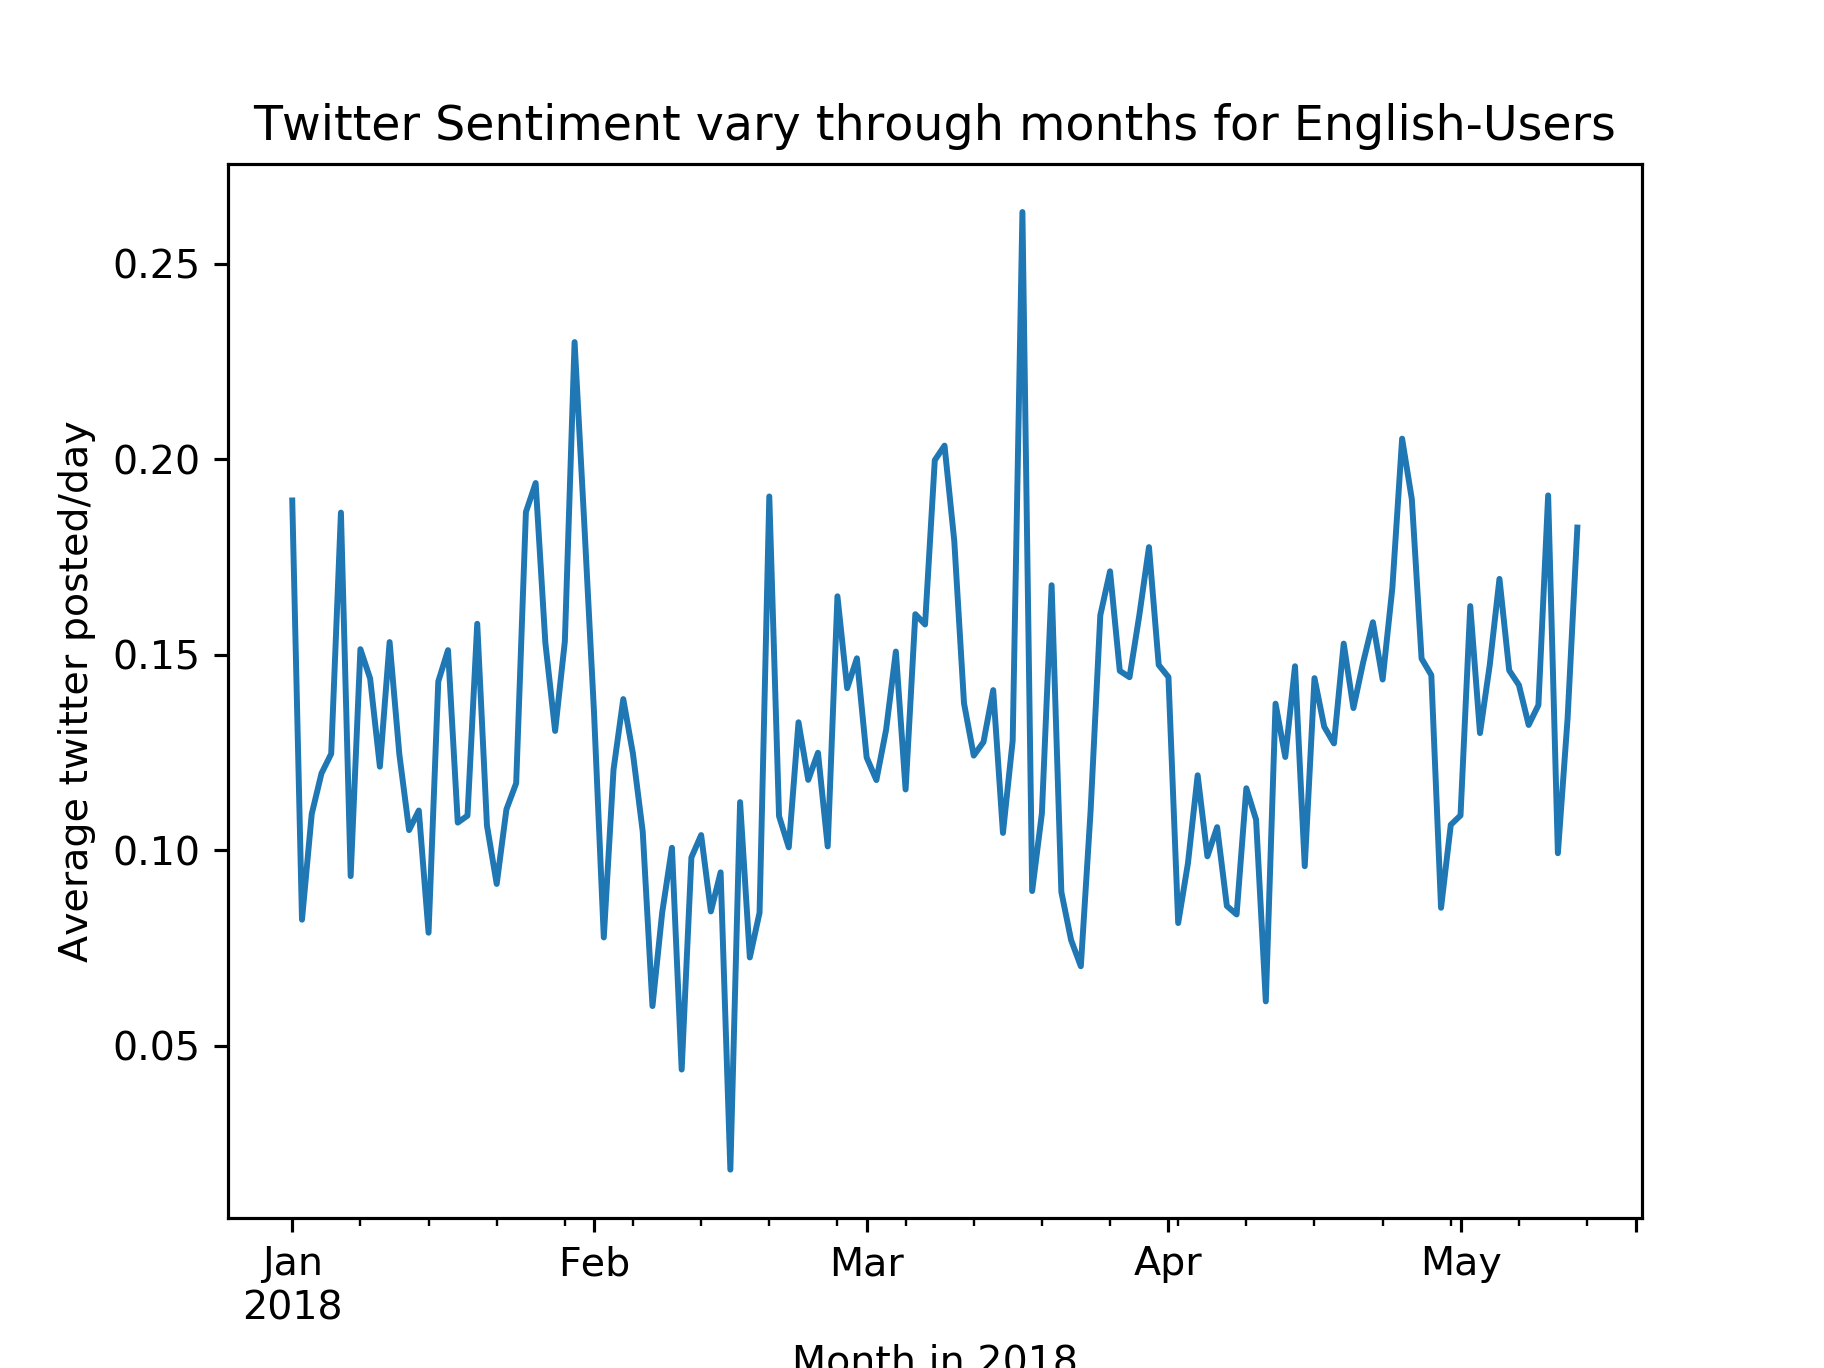

Text(0.5, 1.0, 'Twitter Sentiment vary through months for English-Users')

In [215]:
%matplotlib notebook
d2 = raw_data_notnull.groupby('dates').sentiment.mean()
# d2.plot()
myplot = d2.plot(kind='line')
myplot.set_xlabel('Month in 2018')
myplot.set_ylabel('Average twitter posted/day')
myplot.set_title('Twitter Sentiment vary through months for English-Users')

In [109]:
'''
Function: convert string number to int (eg. 1.2K --> 1200, 45-->45)
Input: numbers(string)
Output: int number
'''
def str_to_int(s):
    regexp = re.compile(r'K')
    if regexp.search(s):
        pattern = r'\d*\.?\d'
        m =  re.search(pattern,s)
        m1 = m.group()
        n = float(m1)
        return int(n*1000)
    else:
        return int(s)

In [148]:
'''
Function: remove symbols, stopword;tokenization
Input:    raw tweet(string)
Output:   cleaned tweet
'''
def clean_tweet(tweet):
    # remove the symbols that are not English
    letters_only = re.sub("[^a-zA-Z]"," ",tweet)
    # covert it all to lower case
    lower_case = letters_only.lower()
    # split them into saperate words
    words = lower_case.split()
    # get the stopwords and stored in a dictionanry(faster)
    stops = set(stopwords.words("english"))
    # remove stop words
    words = [w for w in words if not w in stopwords.words("english")]
    # re-combine the cleaned and useful words to return
    return (" ".join(words))


'''
Function: remove reply expression (eg. @DonaldTrump)
Input:    raw dataset (dataframe)
Output:   cleaned dataset (dataframe)
'''
def rm_reply_symbol(dataset):
    data_copy = dataset.copy()
    pattern = re.compile('@\S*[\s.,\/#!$%\^&\*;:{}=\-_`~()]')
    length = len(dataset)
    for i in range(0,length):
        text = data_copy.loc[i,"tweet"]
        dataset.loc[i,"tweet"] = pattern.sub('',text)

In [186]:
'''
Function: classify the tweet to positive 1, neutral 0, negtive -1
          and return the list of the result
Input:    raw dataset (dataframe)
Output:   result of classification (list)
'''
def get_sentiments(dataset):
    data_copy = dataset.copy()
    # store [classification]
    pol_class = []
    for i in range(len(dataset)):
        tweet = data_copy.loc[i,'tweet']
        tb = TextBlob(tweet)
        p = tb.sentiment.polarity
        if p > 0.1:
            result = 1
        elif p >= -0.1 and p<= 0.1:
            result = 0
        else:
            result = -1
        pol_class.append(result)
        if i % 10 == 0:
            print(i)
        
    return pol_class

In [195]:
'''
Function: reservior sampler
          sampling randomly and uniformly(can be proved by math)
          --> find the random index first, then get the rows
Input: k (int) --> the number of samples needed
       dataset (dataframe)--> the dataframe sampled from
Output: sampled dataframe
'''
def sampler(k,dataset):
    index = []
    num_rows = len(dataset)
    if k > num_rows or k <= 0:
        return "sampling size 'k' is not valid, try other 'k'"
    for i in range(0,num_rows):
        if i < k:
            index.append(i)
        else:
            random_index = random.randint(0,i)
            if random_index < k:
                index[random_index] = i
    return dataset.iloc[index]